In [ ]:
!pip install haversine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/DATA KOTANATOMI WHC 2019.xlsx', )
df.head()

,Longitude,Latitude,Tipe,Keterangan,Scale,Ukuran,Komoditas,Jam,Rute,Tanggal,Hari
0,106.819670,-6.186905,Kios,Minyak,1.0,S,D: Eceran,2.0,R1,2019-09-22,Senin
1,106.816751,-6.186949,PKL,Eceran,4.0,X,D: Eceran,2.0,R1,2019-09-22,Senin
2,106.823807,-6.186759,PKL,Minuman,3.0,L,B: Minuman,2.0,R1,2019-09-22,Senin
3,106.823524,-6.186725,Sepeda,Starling,1.0,S,B: Minuman,2.0,R1,2019-09-22,Senin
4,106.823481,-6.186713,Sepeda,Starling,1.0,S,B: Minuman,2.0,R1,2019-09-22,Senin


In [ ]:
df = df.replace('Tenda ', 'Tenda')
df = df.replace('Terpal ', 'Terpal')
df = df.replace('Kios ', 'Kios')
df = df.replace('PKL ', 'PKL')
df = df.replace('Warung ', 'Warung')
df = df.replace('Sepeda ', 'Sepeda')
df = df.replace('Motor ', 'Motor')
df = df.replace('Asongan ', 'Asongan')

In [ ]:
df = df.replace('A : Makanan', 'A: Makanan')
df = df.replace('B : Minuman', 'B: Minuman')
df = df.replace('C : Makanan Minuman', 'C: Makanan Minuman')
df = df.replace('C : Makanan Minuman\xa0', 'C: Makanan Minuman')
df = df.replace('D : Eceran', 'D: Eceran')
df = df.replace('D : Eceran\xa0', 'D: Eceran')
df = df.replace('E : Jasa', 'E: Jasa')
df = df.replace('E : Jasa ', 'E: Jasa')

In [ ]:
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


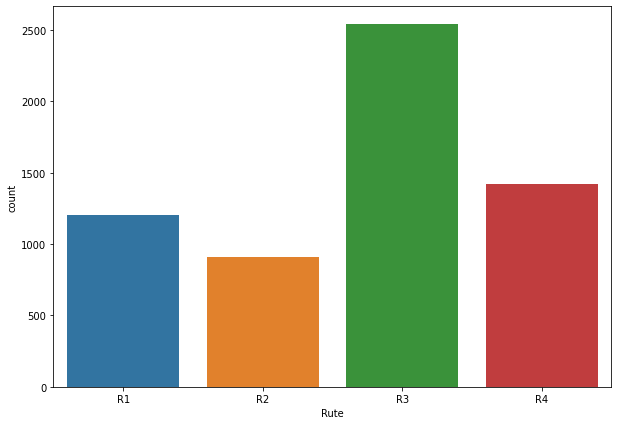

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Rute', data= df)

Dari keempat rute tersebut, rute yang paling banyak pedagang adalah rute 3. Namun hal ini bisa saja dipengaruhi oleh panjang rute 3 yang lebih panjang dibandingkan rute lainnya.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


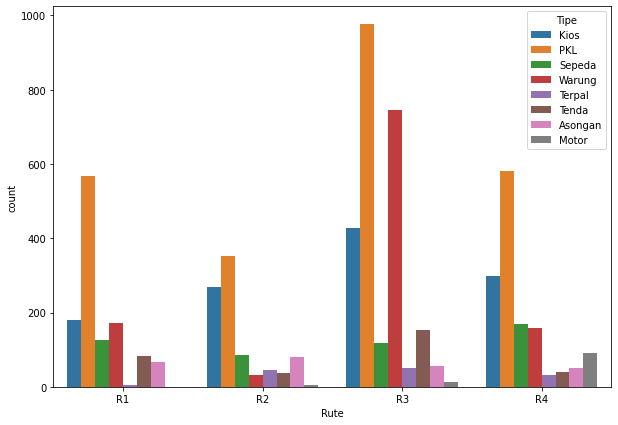

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Rute', data= df, hue= 'Tipe')

Countplot diatas menggambarkan banyaknya tipe pedagang pada setiap rute. Pada setiap rute pedagang yang paling banyak adalah pedagang tipe PKL. Namun jika dilihat dari countplot dibawah, banyaknya pedagang PKL ini disebabkan oleh pedagang pada lokasi observasi paling banyak adalah PKL.

**TIPE PEDAGANG PALING BANYAK BERDASARKAN RUTE**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


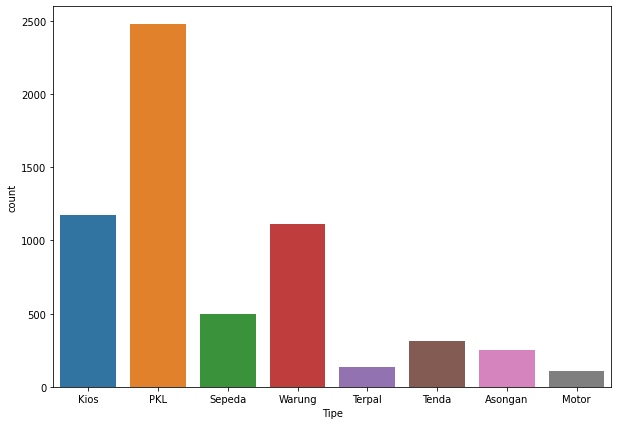

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Tipe', data= df)

Untuk melihat apakah jumlah PKL sama setiap harinya, dibawah ini kita coba lihat dari countplot untuk tipe PKL.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


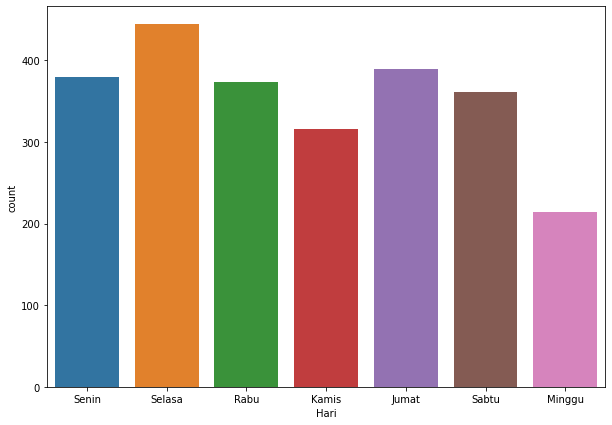

In [ ]:
pkl = df[df['Tipe'] == 'PKL']

plt.subplots(figsize=(10,7))
sns.countplot('Hari', data= pkl)

Jika dilihat pada contplot tersebut jumlahnya berubah-ubah setiap harinya. Jumlah PKL paling banyak adalah hari Selasa dan yang paling sedikit di hari Minggu.

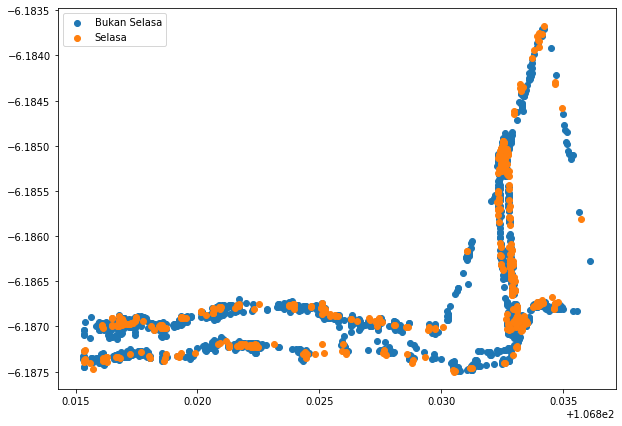

In [ ]:
plt.subplots(figsize=(10,7))
plt.scatter(pkl[~(pkl['Hari'] == 'Selasa')]['Longitude'], pkl[~(pkl['Hari'] == 'Selasa')]['Latitude'], label='Bukan Selasa')
plt.scatter(pkl[(pkl['Hari'] == 'Selasa')]['Longitude'], pkl[(pkl['Hari'] == 'Selasa')]['Latitude'], label='Selasa')
plt.legend()

Dari scatterplot diatas dapat dilihat jika pada hari Selasa yang terjadi adalah penambahan jumlah PKL pada lokasi tertentu. Dari grafik diatas juga dapat dilihat terdapat daerah dimana pada hari Selasa lokasi tersebut tidak ada PKL yang berjualan.

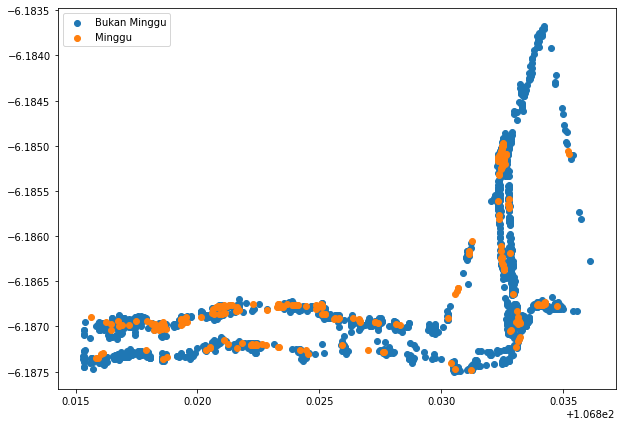

In [ ]:
plt.subplots(figsize=(10,7))
plt.scatter(pkl[~(pkl['Hari'] == 'Minggu')]['Longitude'], pkl[~(pkl['Hari'] == 'Minggu')]['Latitude'], label='Bukan Minggu')
plt.scatter(pkl[(pkl['Hari'] == 'Minggu')]['Longitude'], pkl[(pkl['Hari'] == 'Minggu')]['Latitude'], label='Minggu')
plt.legend()

Untuk hari Minggu sendiri pada lokasi tertentu PKL yang biasa berjualan pada hari Senin-Sabtu tidak berjualan pada hari Minggu, contohnya pada bagian paling utara.

**WARUNG DI HARI RABU**

Selanjutnya jika dilihat pada contplot dibawah, pada hari Rabu jumlah warung lebih banyak dibandingkan hari lainnya.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


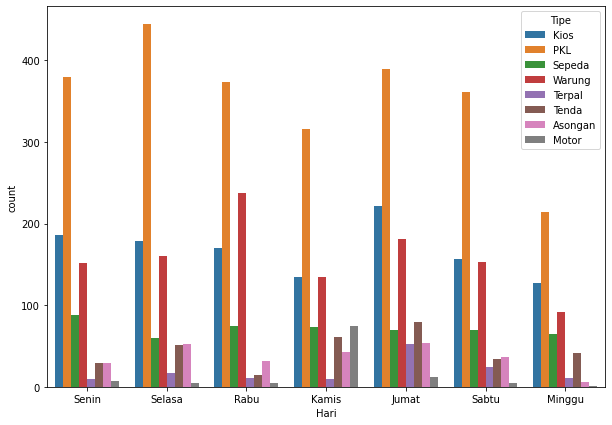

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Hari', data= df, hue='Tipe')

Sebelumnya kita lihat terlebih dahulu pedagang apa saja yang termasuk warung.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


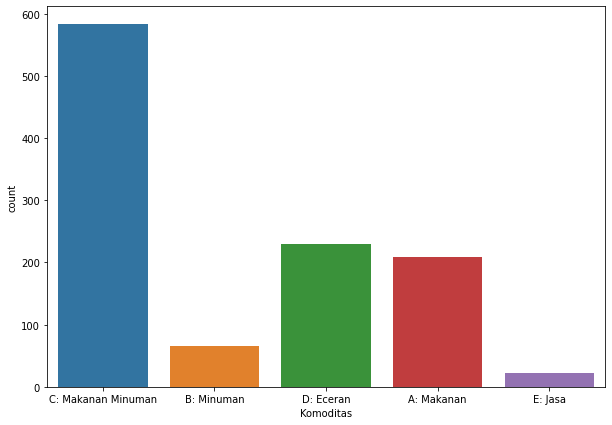

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Komoditas', data=df[df['Tipe']=='Warung'])

Komoditas terbanyak adalah makanan dan minuman. Lalu bagaimana pesebarannya didalam peta?

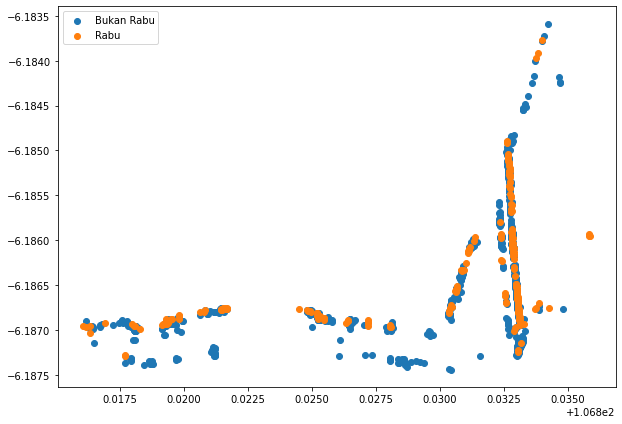

In [ ]:
warung = df[df['Tipe']=='Warung']

plt.subplots(figsize=(10,7))
plt.scatter(warung[~(warung['Hari'] == 'Rabu')]['Longitude'], warung[~(warung['Hari'] == 'Rabu')]['Latitude'], label='Bukan Rabu')
plt.scatter(warung[(warung['Hari'] == 'Rabu')]['Longitude'], warung[(warung['Hari'] == 'Rabu')]['Latitude'], label='Rabu')
plt.legend()

Sama halnya seperti PKL pada hari Selasa, pada hari Rabu pada beberapa tempat memang terjadi penambahan jumlah warung tapi bukan pada lokasi yang pada hari lain tidak ada warung.

**JUMAT BERKAH ECERAN**

Selanjutnya, mari kita lihat jumlah pedagang setiap harinya.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


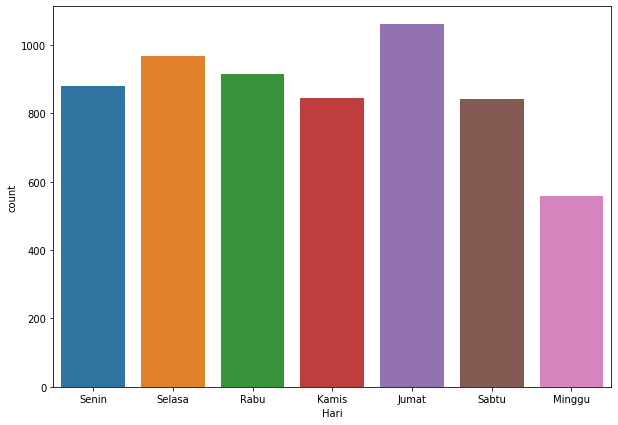

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Hari', data= df)

Dalam countplot diatas dapat dilihat bahwa jumlah pedagang paling banyak terjadi di hari Jumat, sedangkan paling sedikit di hari Minggu. Hal ini mungkin bisa diartikan pedagang tersebut memiliki pasar pada hari Senin - Sabtu.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


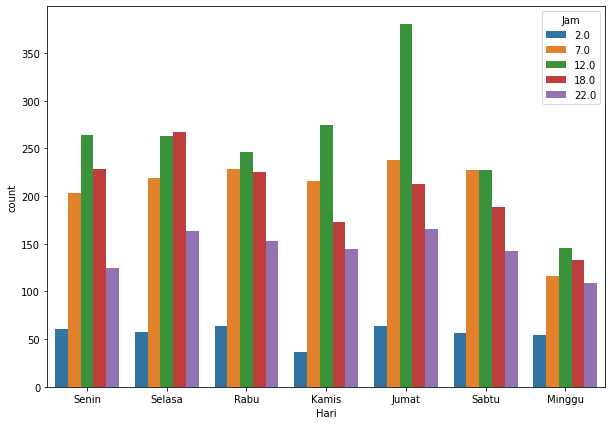

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Hari', data= df, hue='Jam')

Dari countplot diatas dapat dilihat, peningkatan jumlah pedagang di hari Jum'at berada pada jam 12 siang. Sedangkan jika pada barplot sebelumnya jumlah pedagang pada hari Kamis dan Sabtu itu sama, namun pada hari sabtu jumlah pedagang pada jam 7 hari Sabtu lebih banyak dibandingkan hari Kamis jam 7. Sedangkan pada hari Kamis jam ramai pedagang pada jam 12.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


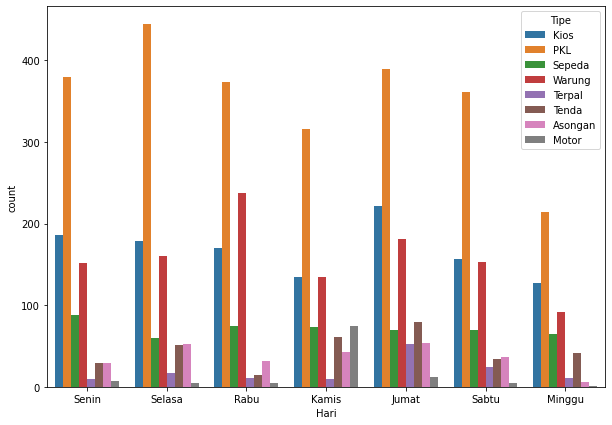

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Hari', data= df, hue='Tipe')

Pada hari Jum'at ternyata pedagang yang jumlahnya meningkat adalah pedagang Kios.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


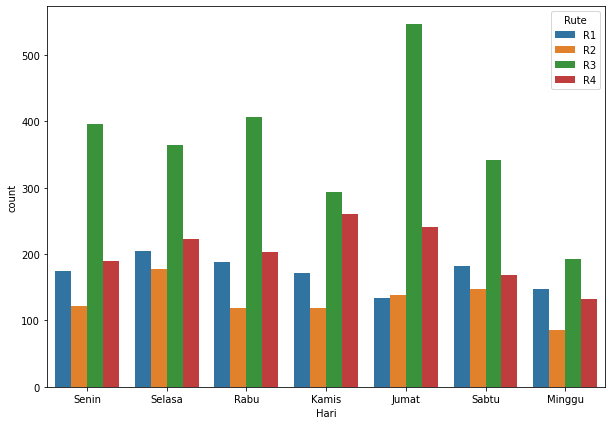

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Hari', data= df, hue='Rute')

Ternyata dari countplot diatas, pada hari Jum'at peningkatan pedagang terjadi pada Rute 3. Untuk itu mari kita coba lihat apa kemungkinan yang mempengaruhi hal tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


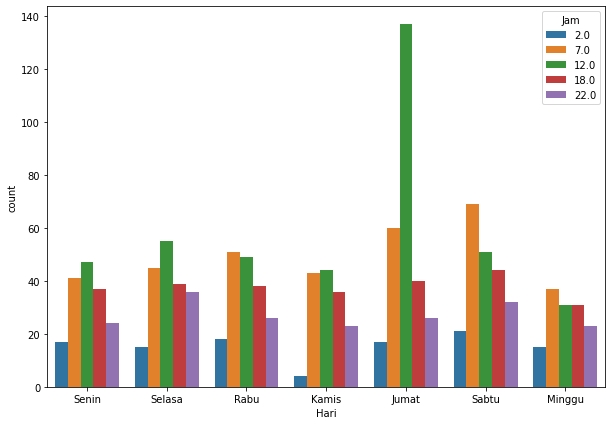

In [ ]:
temp1 = df[df['Komoditas'] == 'D: Eceran']

plt.subplots(figsize=(10,7))
sns.countplot('Hari', data= temp1, hue='Jam')

Dari Countplot diatas dapat dilihat, bahwa jumlah pedagang Eceran meningkat pada jam 12 di hari Jumat. Untuk itu mari kita lihat lokasi rute dimana jumlah pedagang eceran meningkat.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


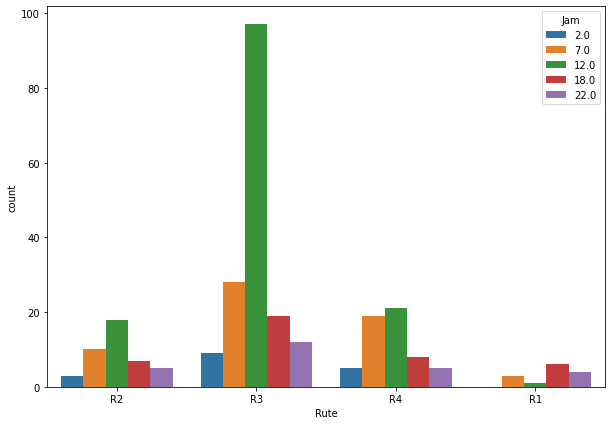

In [ ]:
temp2 = df[(df['Komoditas'] == 'D: Eceran') & (df['Hari'] == 'Jumat')]

plt.subplots(figsize=(10,7))
sns.countplot('Rute', data= temp2, hue='Jam')

Rute 3 melewati Masjid Cut Mutia hal ini bisa saja menjadi salah satu alasan mengapa banyak pedagang eceran pada jam 12 siang pada hari Jumat. Untuk itu mari kita lihat seberpa jauh lokasi pedagang eceran tersebut dengan masjid.

In [ ]:
masjid = [106.8333756989, -6.18725605]

In [ ]:
import haversine as hs
from haversine import Unit

In [ ]:
def convert_jarak(data_1, data_2):
  dist = []

  loc1 = (data_1[1], data_1[0])
  for long_jalan, lat_jalan in zip(data_2['Longitude'], data_2['Latitude']):
    temp1 = []
    loc2 = (lat_jalan, long_jalan)
    temp = hs.haversine(loc1,loc2,unit=Unit.METERS)
    dist.append(temp)
  return dist

In [ ]:
jarak_kemasjid = convert_jarak(masjid, temp2)
temp2['Jarak_kemasjid'] = jarak_kemasjid

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


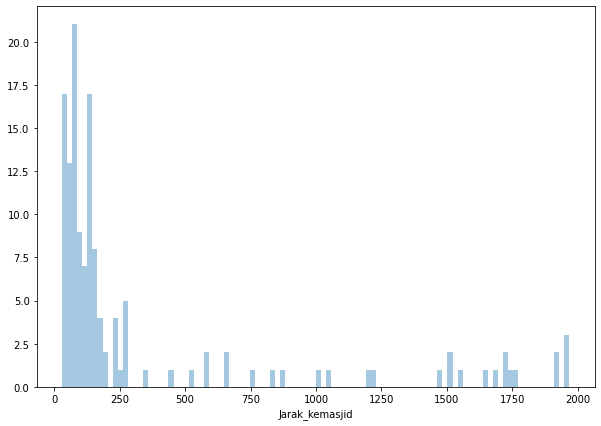

In [ ]:
plt.subplots(figsize=(10,7))
sns.distplot(temp2[temp2['Jam'] == 12]['Jarak_kemasjid'], kde=False, bins=100)

Dengan menggunakan metode haversine, kita dapat menghitung jarak pedagang dengan masjid. Hasilnya, pedagang eceran di hari Jumat memang paling banyak lokasinya berada sekitar kurang dari 250 meter dari masjid.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


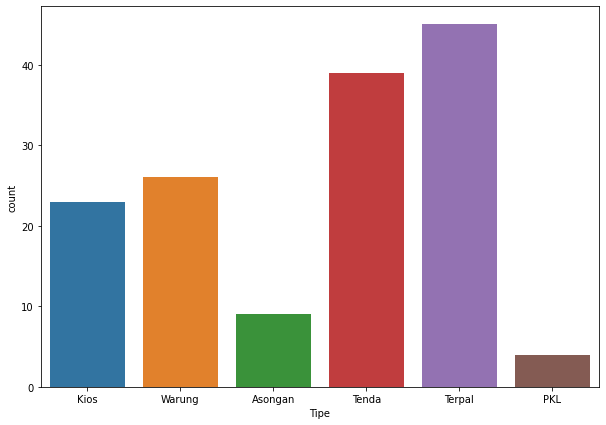

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Tipe', data= temp2[temp2['Jarak_kemasjid'] <= 250])

Pedagang yang berjualan di sekitar masjid ini kebanyakan terpal atau tenda karena meraka bukan pedagang permanen di lokasi tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

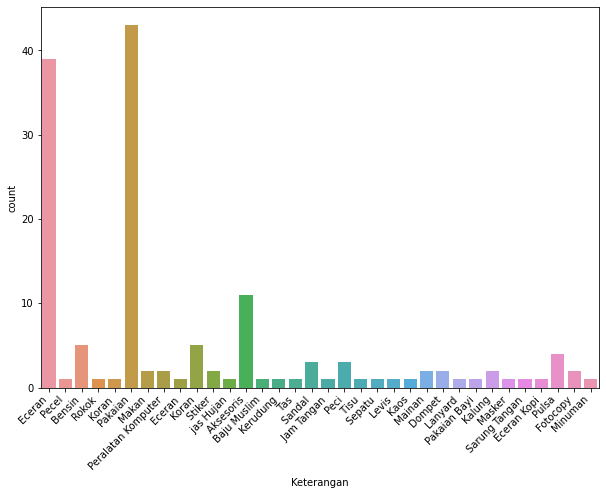

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Keterangan', data= temp2[temp2['Jarak_kemasjid'] <= 250])
plt.xticks(rotation=45, ha='right')

Dapat diperhatikan pedagang eceran yang berjarak kurang dari 250 paling banyak adalah pedagang pakaian.

**JAM MAKAN SIANG**

Mari kembali ke countplot terhadap komoditas pedagang di jalan observasi tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


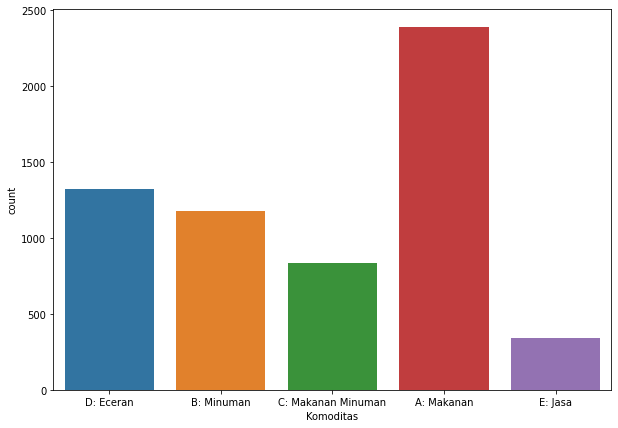

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot('Komoditas', data= df)

Pedagang makanan merupakan pedagang yang paling banyak berjualan pada jalan yang menjadi lokasi observasi.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


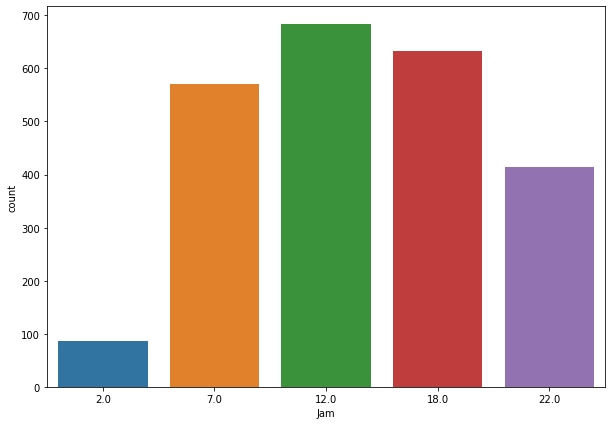

In [ ]:
makanan = df[df['Komoditas'] == 'A: Makanan']

plt.subplots(figsize=(10,7))
sns.countplot('Jam', data= makanan)

Pedagang makanan paling banyak berjualan pada jam 12 atau waktu makan siang.